# SMIPS: Exploration into blended precipitation anomalies
Faulty data - rainfall which is in the unrealistic hundreds and thousands of mm in unlikely locations - has been found in the SMIPS file. The purpose of this exploration is to determine a threshold at which data is determined to be faulty and will not be used in the soil moisture workflow. 

In [25]:
import settings
import os
import xarray as xr
from netCDF4 import Dataset
import numpy as np

In [2]:
SMIPS_AGG = '/datasets/work/lw-soildatarepo/work/SMIPSRegrid/SMIPS.nc'
sm = xr.open_dataset(SMIPS_AGG, decode_times=False)

## For threshold = 1000

In [57]:
ms = []
for time in range(sm.time.size):
    m = np.nanmax(sm.blended_precipitation.values[time])
    if m > 1000:
        print(time, np.nanmax(sm.blended_precipitation.values[time]))
        ms.append([time, np.nanmax(sm.blended_precipitation.values[time])])
print(len(ms))

242 4309.75
960 1451.3477
963 1708.6416
971 1091.4648
982 2078.33
983 1769.6572
986 3772.8418
987 1265.4395
988 2448.6348
991 1271.7578
1000 1596.3242
1002 1277.292
1006 21470.254
1007 23596.21
1008 6483.498
1013 5774.2803
1016 1696.0947
1035 5797.16
18


Originally there were 19, 18 is appropriate because the data from 911 has been deleted.  

However, it doesn't catch 981. But does catch 960 which I (manually) didn't.

Decrease the threshold to catch 981.


## For threshold = 900

In [58]:
ms2 = []
for time in range(sm.time.size):
    m = np.nanmax(sm.blended_precipitation.values[time])
    if m > 900:
        print(time, np.nanmax(sm.blended_precipitation.values[time]))
        ms2.append([time, np.nanmax(sm.blended_precipitation.values[time])])
print(len(ms2))

242 4309.75
960 1451.3477
963 1708.6416
971 1091.4648
981 993.29395
982 2078.33
983 1769.6572
986 3772.8418
987 1265.4395
988 2448.6348
991 1271.7578
1000 1596.3242
1002 1277.292
1006 21470.254
1007 23596.21
1008 6483.498
1013 5774.2803
1016 1696.0947
1035 5797.16
19


Catches all known bad values. However, this isn't a great method of doing it because 900 could be a real value of rainfall - an extreme. 

## Exploration

In [93]:
rainmax = []
for time in range(sm.time.size):
    m = np.nanmax(sm.blended_precipitation.values[time])
    rainmax.append(np.nanmax(sm.blended_precipitation.values[time]))

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

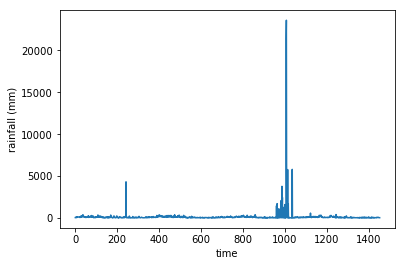

In [95]:
plt.xlabel('time')
plt.ylabel('rainfall (mm)')
plt.plot(rainmax)

0 23596.21
1 21470.254
2 6483.498
3 5797.16
4 5774.2803
5 4309.75
6 3772.8418
7 2448.6348
8 2078.33
9 1769.6572
10 1708.6416
11 1696.0947
12 1596.3242
13 1451.3477
14 1277.292
15 1271.7578
16 1265.4395
17 1091.4648
18 993.29395
19 576.7803
20 406.0791
21 377.3584
22 376.59668
23 361.84082
24 359.00684
25 357.70117
26 356.16797
27 345.68555
28 338.69238
29 331.95117


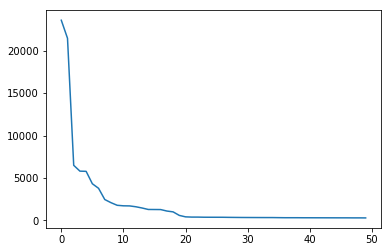

In [107]:
rainsorted = -np.sort(-np.array(rainmax))
for i in range(30):
    print(i, rainsorted[i])
plt.plot(rainsorted[:50])

Going to choose the limit of 900, as it fits the data, and the issue was old so it may not come up again in new data. 

Reference: bom.gov.au/water/designRainfalls/rainfallEvents/ausRecordRainfall.shtml

I think it would be impossible for it to rain more than 900mm in one day. The records in the reference sometimes stretch over many days -- keep that in the calculations while comparing. 